In [1]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import cv2

In [2]:
# dataset generation
def simulate_crop_health_data():
    np.random.seed(42)
    
    # Features: [chlorophyll_level, leaf_moisture, temperature, humidity, soil_ph]
    healthy_data = np.column_stack([
        np.random.normal(0.85, 0.05, 100),  # chlorophyll
        np.random.normal(0.75, 0.08, 100),  # moisture
        np.random.normal(25, 2, 100),       # temperature
        np.random.normal(65, 5, 100),       # humidity
        np.random.normal(6.5, 0.3, 100)     # soil pH
    ])
    
    early_blight_data = np.column_stack([
        np.random.normal(0.60, 0.10, 100),
        np.random.normal(0.85, 0.10, 100),  # higher moisture
        np.random.normal(28, 3, 100),       # higher temp
        np.random.normal(75, 8, 100),       # higher humidity
        np.random.normal(5.8, 0.4, 100)     # lower pH
    ])
    
    late_blight_data = np.column_stack([
        np.random.normal(0.40, 0.15, 100),
        np.random.normal(0.90, 0.05, 100),  # very high moisture
        np.random.normal(22, 4, 100),       # lower temp
        np.random.normal(85, 6, 100),       # very high humidity
        np.random.normal(5.5, 0.5, 100)     # acidic soil
    ])
    
    nutrient_deficit_data = np.column_stack([
        np.random.normal(0.50, 0.12, 100),
        np.random.normal(0.60, 0.15, 100),  # lower moisture
        np.random.normal(26, 2, 100),
        np.random.normal(60, 10, 100),
        np.random.normal(7.2, 0.6, 100)     # alkaline soil
    ])
    
    # Combine data
    X = np.vstack([healthy_data, early_blight_data, late_blight_data, nutrient_deficit_data])
    
    # Create labels
    y = np.array([0]*100 + [1]*100 + [2]*100 + [3]*100)  # 0=healthy, 1=early_blight, etc.
    
    return X, y

# 2. GENERATE AND EXPLORE DATA
print("Generating synthetic crop health data...")
X, y = simulate_crop_health_data()
feature_names = ['Chlorophyll', 'Moisture', 'Temperature', 'Humidity', 'Soil_pH']
class_names = ['Healthy', 'Early Blight', 'Late Blight', 'Nutrient Deficit']

print(f"Dataset shape: {X.shape}")
print(f"Classes: {class_names}")

Generating synthetic crop health data...
Dataset shape: (400, 5)
Classes: ['Healthy', 'Early Blight', 'Late Blight', 'Nutrient Deficit']


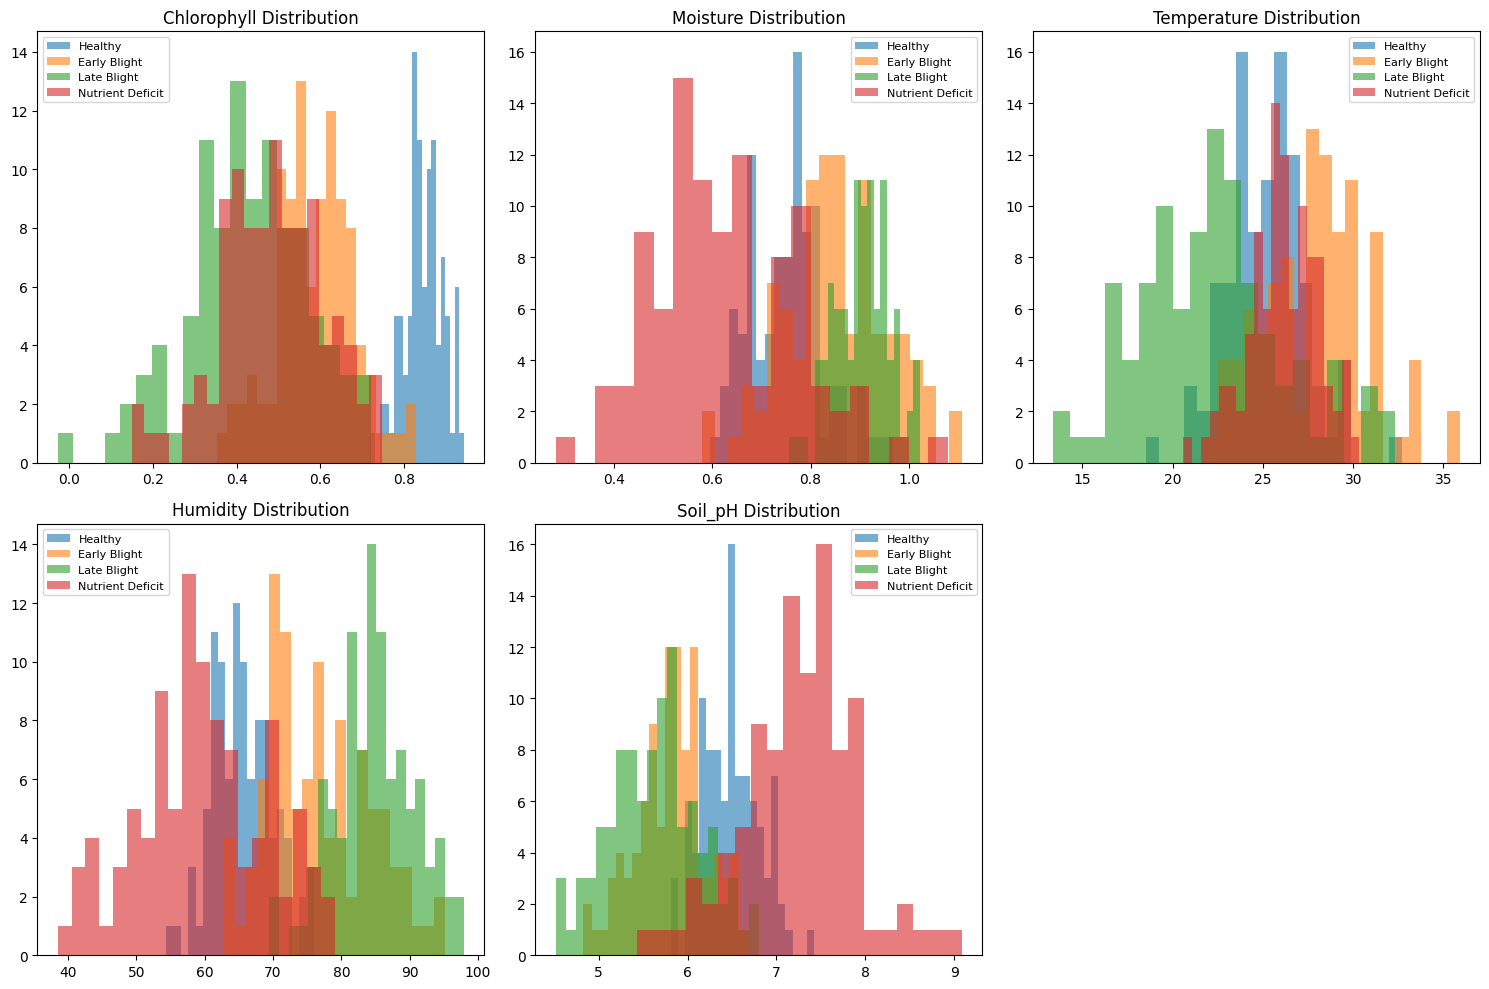

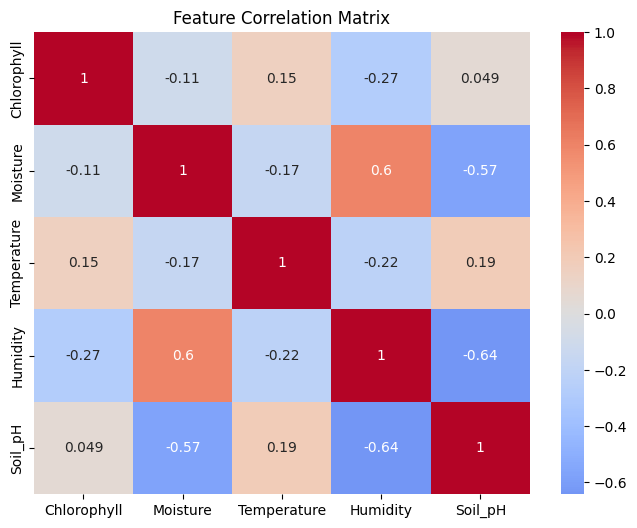

In [3]:
# graphs for analysis
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 3, i+1)
    for class_idx, class_name in enumerate(class_names):
        class_data = X[y == class_idx, i]
        plt.hist(class_data, alpha=0.6, label=class_name, bins=20)
    plt.title(f'{feature} Distribution')
    plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = np.corrcoef(X.T)
sns.heatmap(correlation_matrix, annot=True, xticklabels=feature_names, 
            yticklabels=feature_names, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

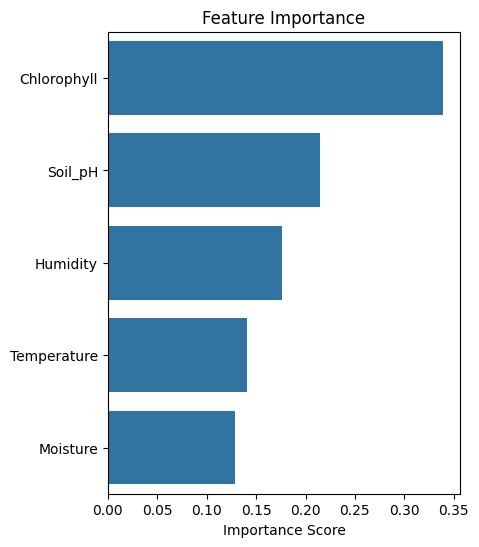

In [8]:
# Feature Importance
plt.figure(figsize=(10, 6))
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.subplot(1, 2, 1)
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

In [4]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [7]:
# 5. MODEL EVALUATION
print("MODEL PERFORMANCE")
accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy: {accuracy:.2%}")

print("\n Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

MODEL PERFORMANCE
 Model Accuracy: 87.50%

 Detailed Classification Report:
                  precision    recall  f1-score   support

         Healthy       0.90      0.95      0.93        20
    Early Blight       0.82      0.70      0.76        20
     Late Blight       0.82      0.90      0.86        20
Nutrient Deficit       0.95      0.95      0.95        20

        accuracy                           0.88        80
       macro avg       0.87      0.88      0.87        80
    weighted avg       0.87      0.88      0.87        80



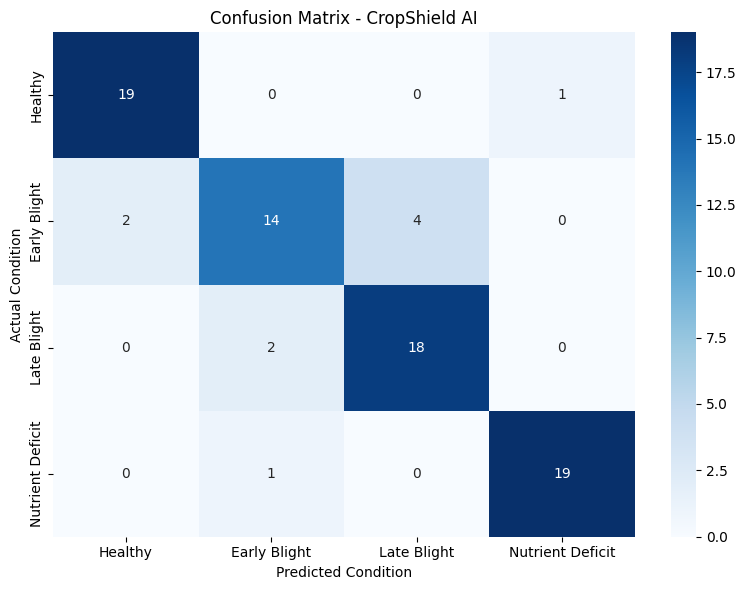

In [9]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - CropShield AI')
plt.ylabel('Actual Condition')
plt.xlabel('Predicted Condition')
plt.tight_layout()
plt.show()

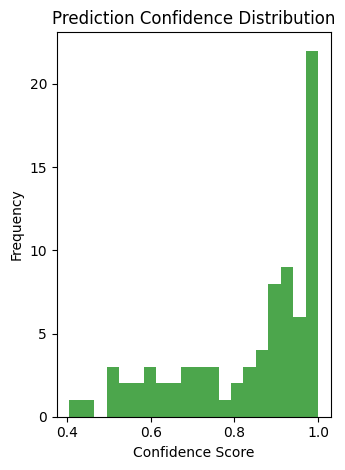

In [10]:
# Model Confidence
plt.subplot(1, 2, 2)
confidence_scores = y_pred_proba.max(axis=1)
plt.hist(confidence_scores, bins=20, alpha=0.7, color='green')
plt.title('Prediction Confidence Distribution')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

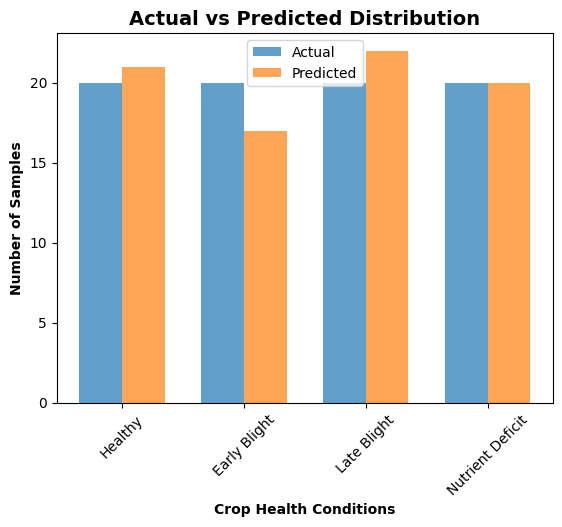

In [24]:
# actual vs predicted comparison graph
actual_counts = [np.sum(y_test == i) for i in range(4)]
predicted_counts = [np.sum(y_pred == i) for i in range(4)]

x_pos = np.arange(len(class_names))
width = 0.35

plt.bar(x_pos - width/2, actual_counts, width, label='Actual', alpha=0.7)
plt.bar(x_pos + width/2, predicted_counts, width, label='Predicted', alpha=0.7)

plt.xlabel('Crop Health Conditions', fontweight='bold')
plt.ylabel('Number of Samples', fontweight='bold')
plt.title('Actual vs Predicted Distribution', fontsize=14, fontweight='bold')
plt.xticks(x_pos, class_names, rotation=45)
plt.legend()

In [14]:
# 6. REAL-TIME PREDICTION
print("REAL-TIME PREDICTION")

def predict_crop_health(features):
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0]
    confidence = np.max(probability)
    
    return class_names[prediction], confidence, probability

# Test with sample data
test_cases = [
    [0.82, 0.72, 24, 63, 6.4],    # Should be Healthy
    [0.58, 0.88, 29, 78, 5.7],    # Should be Early Blight
    [0.35, 0.92, 21, 87, 5.3],    # Should be Late Blight
    [0.48, 0.55, 27, 58, 7.4],    # Should be Nutrient Deficit
]

print("Testing with sample field data:")
for i, test_case in enumerate(test_cases):
    prediction, confidence, all_probs = predict_crop_health(test_case)
    print(f"Test {i+1}: {prediction} (Confidence: {confidence:.2%})")

REAL-TIME PREDICTION
Testing with sample field data:
Test 1: Healthy (Confidence: 100.00%)
Test 2: Early Blight (Confidence: 93.88%)
Test 3: Late Blight (Confidence: 98.88%)
Test 4: Nutrient Deficit (Confidence: 100.00%)
